In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
file_path = 'D:\Internships\CodexCue\Project 3\hotel_booking.csv'  # Update with your file path
hotel_data = pd.read_csv(file_path)

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18576\3679551211.py:2: SyntaxWarning: invalid escape sequence '\I'
  file_path = 'D:\Internships\CodexCue\Project 3\hotel_booking.csv'  # Update with your file path


In [5]:
# Understanding the data types of each column
data_types = hotel_data.dtypes
print("Data Types:\n", data_types)

Data Types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                

In [6]:
# Identifying missing values in the dataset
missing_values = hotel_data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              1634

In [7]:
# Generating basic statistical summaries of numerical columns
basic_stats = hotel_data.describe()
print("\nBasic Statistics:\n", basic_stats)


Basic Statistics:
          is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   3

In [8]:
# Reviewing unique values in categorical columns
categorical_columns = hotel_data.select_dtypes(include=['object']).columns
unique_values = {col: hotel_data[col].unique() for col in categorical_columns}
print("\nUnique Values in Categorical Columns:\n", unique_values)


Unique Values in Categorical Columns:
 {'hotel': array(['Resort Hotel', 'City Hotel'], dtype=object), 'arrival_date_month': array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object), 'meal': array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object), 'country': array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
    

In [9]:
# Handling missing values
# Filling missing values in 'children' with the median
hotel_data['children'].fillna(hotel_data['children'].median(), inplace=True)

# Filling missing values in 'agent' and 'company' with a placeholder
hotel_data['agent'].fillna(-1, inplace=True)
hotel_data['company'].fillna(-1, inplace=True)

# Filling missing values in 'country' with the mode
hotel_data['country'].fillna(hotel_data['country'].mode()[0], inplace=True)

# Checking if there are any remaining missing values
remaining_missing_values = hotel_data.isnull().sum()
print("\nRemaining Missing Values:\n", remaining_missing_values)


Remaining Missing Values:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18576\1431280594.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['children'].fillna(hotel_data['children'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18576\1431280594.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [10]:
# Feature Engineering: Creating new features

# Total Stay Duration
hotel_data['total_stay_duration'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']

# Extracting Booking Year and Month from reservation_status_date
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
hotel_data['booking_year'] = hotel_data['reservation_status_date'].dt.year
hotel_data['booking_month'] = hotel_data['reservation_status_date'].dt.month

# Creating a boolean feature indicating if the booking includes a weekend stay
hotel_data['weekend_stay'] = hotel_data['stays_in_weekend_nights'] > 0

# Display the first few rows of the updated dataset to verify changes
print("\nUpdated Dataset:\n", hotel_data.head())


Updated Dataset:
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1              

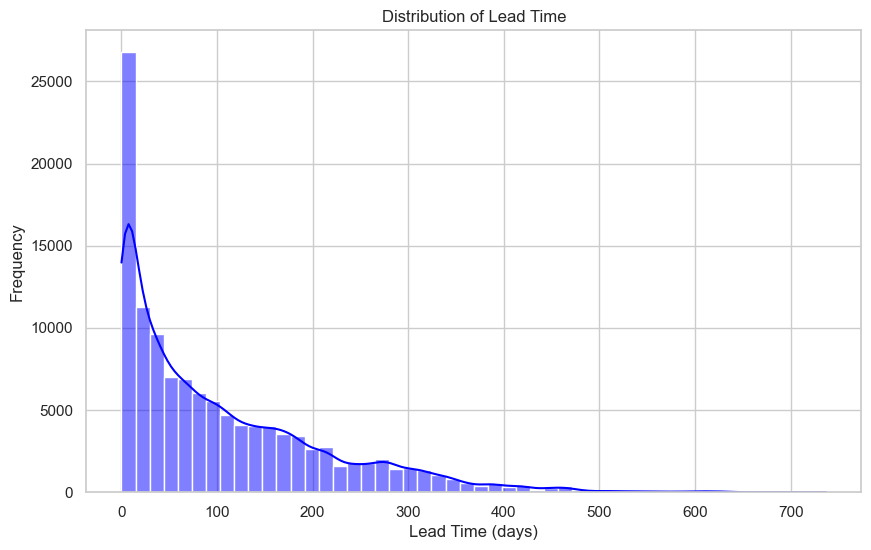

In [11]:
# Setting up the visualizations
sns.set(style="whitegrid")

# Univariate Analysis: Distribution of Lead Time
plt.figure(figsize=(10, 6))
sns.histplot(hotel_data['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

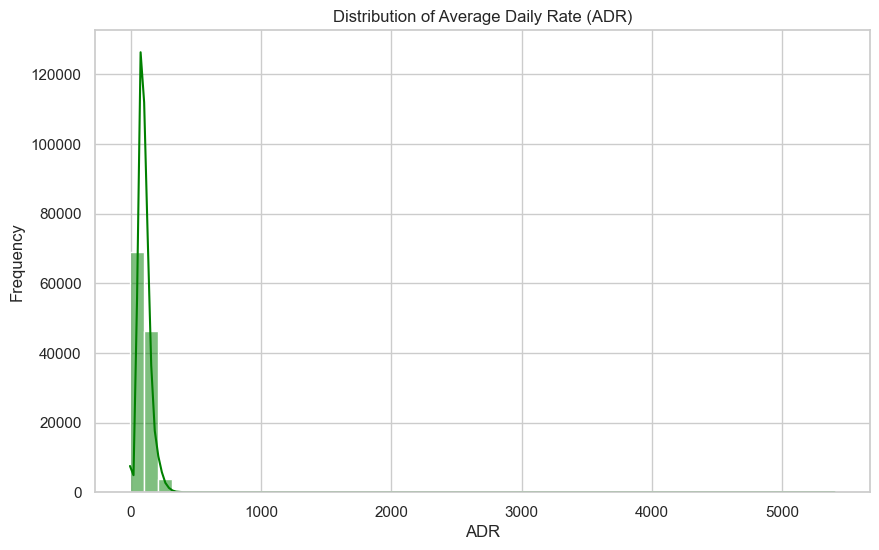

In [12]:
# Univariate Analysis: Distribution of Average Daily Rate (ADR)
plt.figure(figsize=(10, 6))
sns.histplot(hotel_data['adr'], bins=50, kde=True, color='green')
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18576\168566476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_data, x='hotel', palette='Set2')


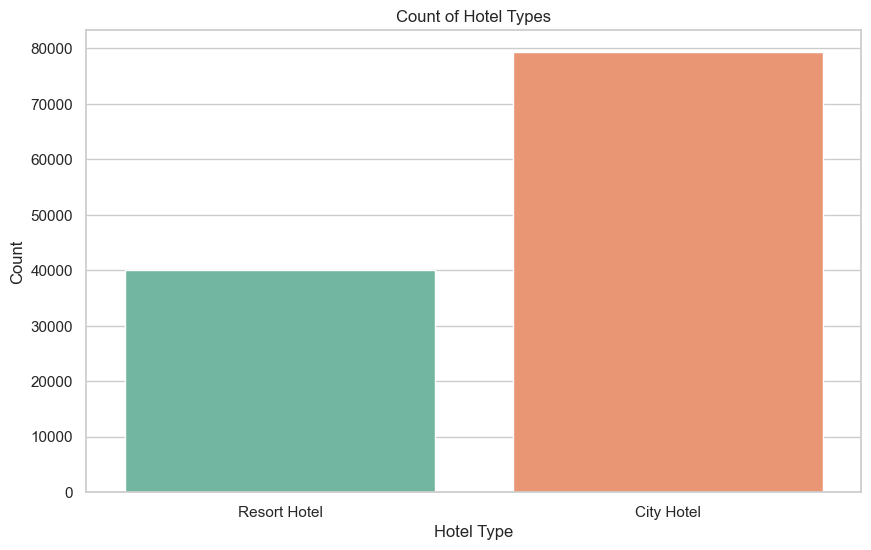

In [13]:
# Univariate Analysis: Count Plot of Hotel Types
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel_data, x='hotel', palette='Set2')
plt.title('Count of Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18576\1605663092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hotel_data, x='is_canceled', y='lead_time', palette='Set1')


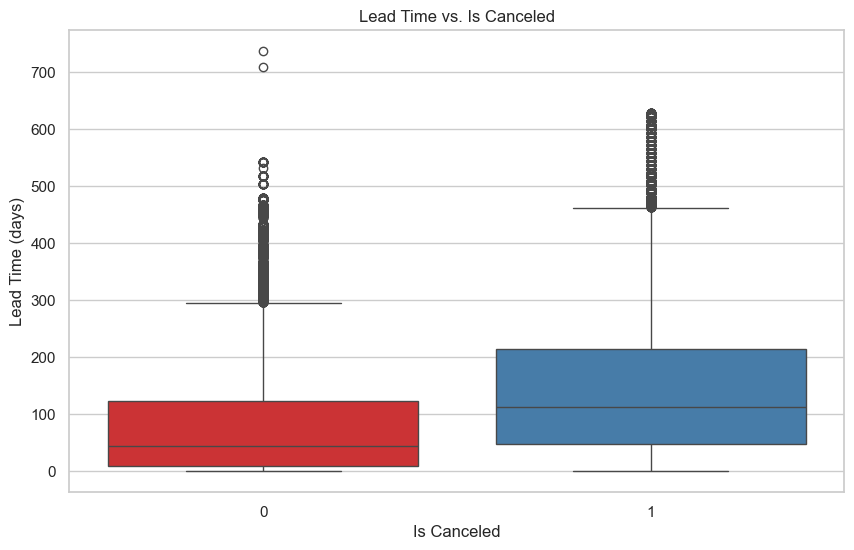

In [14]:
# Bivariate Analysis: Lead Time vs. Is Canceled
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotel_data, x='is_canceled', y='lead_time', palette='Set1')
plt.title('Lead Time vs. Is Canceled')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time (days)')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18576\2447217122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hotel_data, x='hotel', y='adr', palette='Set3')


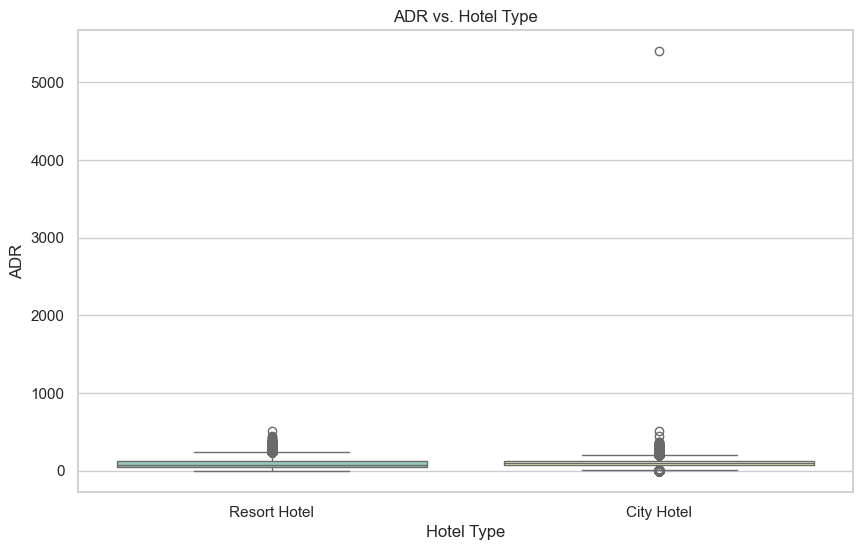

In [15]:
# Bivariate Analysis: ADR vs. Hotel Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotel_data, x='hotel', y='adr', palette='Set3')
plt.title('ADR vs. Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Lenovo

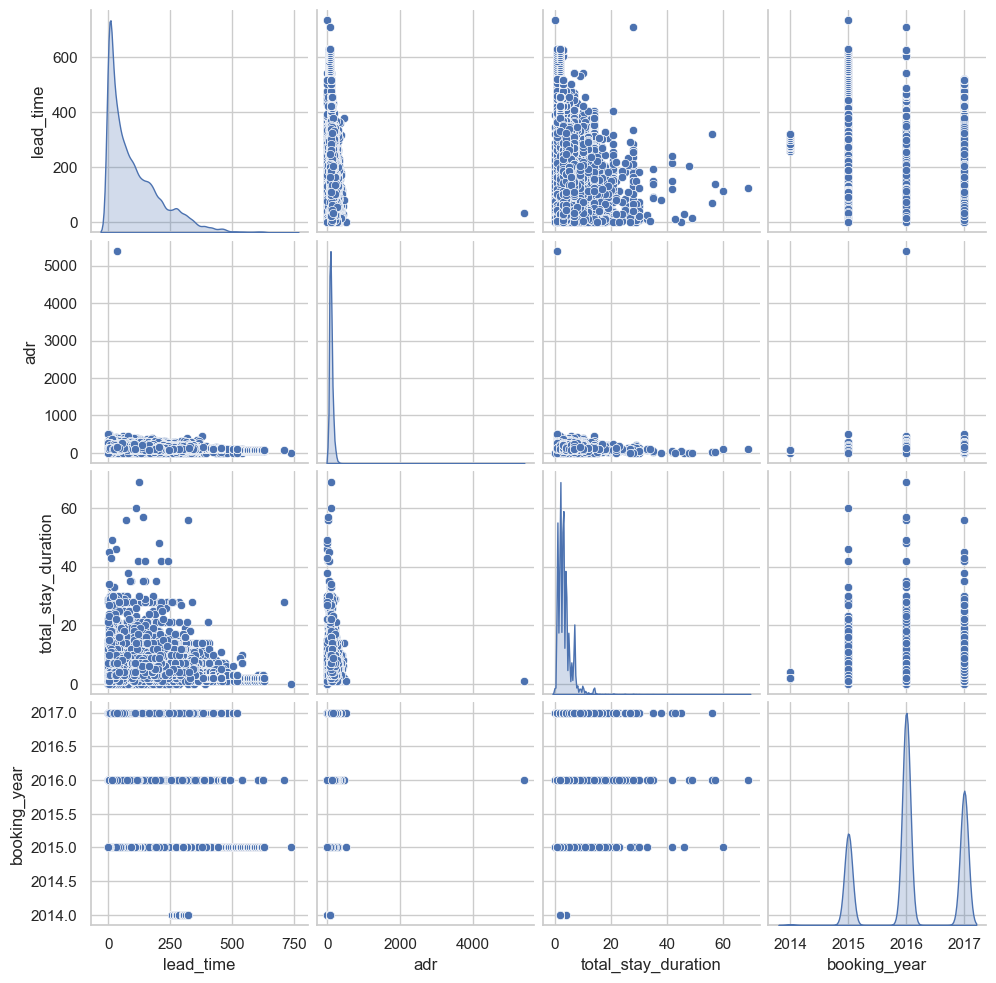

In [16]:
# Multivariate Analysis: Pair Plot of Key Variables
sns.pairplot(hotel_data[['lead_time', 'adr', 'total_stay_duration', 'booking_year']], diag_kind='kde', palette='husl')
plt.show()

In [18]:
import plotly.express as px

# Interactive Visualization: Lead Time Distribution by Hotel Type
fig = px.histogram(hotel_data, x='lead_time', color='hotel', marginal='box', nbins=50, title='Lead Time Distribution by Hotel Type')
fig.show()
